In [1]:
import tensorflow.keras as keras
from tensorflow.keras import layers
import tensorflow
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()




In [2]:
print("Training data shape: ", X_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", X_test.shape)
print("Test labels shape: ", y_test.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


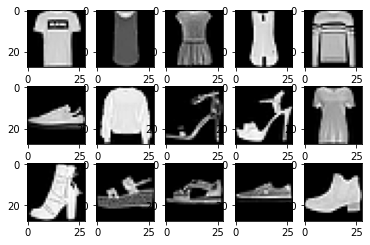

In [3]:
import matplotlib.pyplot as plt

for i in range(1, 16):
    
    plt.subplot(3, 5, i)

    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
 
# Display the entire plot
plt.show()

In [4]:


# Reshape the data to add a channel dimension for convolutional layers
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:



X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [6]:

model = tensorflow.keras.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [7]:

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:




# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.4960 - accuracy: 0.8196 - val_loss: 0.3576 - val_accuracy: 0.8702
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3194 - accuracy: 0.8839 - val_loss: 0.3091 - val_accuracy: 0.8873
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2755 - accuracy: 0.8998 - val_loss: 0.2938 - val_accuracy: 0.8932
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2453 - accuracy: 0.9104 - val_loss: 0.2705 - val_accuracy: 0.9032
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2219 - accuracy: 0.9177 - val_loss: 0.2650 - val_accuracy: 0.9040
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2021 - accuracy: 0.9249 - val_loss: 0.2733 - val_accuracy: 0.9037
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1856 - accuracy: 0.9302 - val_loss: 0.2652 -

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np


In [14]:
y_pred =model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = y_test
acc = accuracy_score(Y_true,Y_pred_classes)
class_report = classification_report(Y_true,Y_pred_classes)



print('The accuracy: {}'.format(acc))
print('The Classification Report:\n {}'.format(class_report))

The accuracy: 0.9096
The Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.88      0.87      1000
           3       0.92      0.90      0.91      1000
           4       0.82      0.90      0.86      1000
           5       0.97      0.98      0.98      1000
           6       0.77      0.74      0.75      1000
           7       0.96      0.94      0.95      1000
           8       0.96      0.99      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<AxesSubplot:>

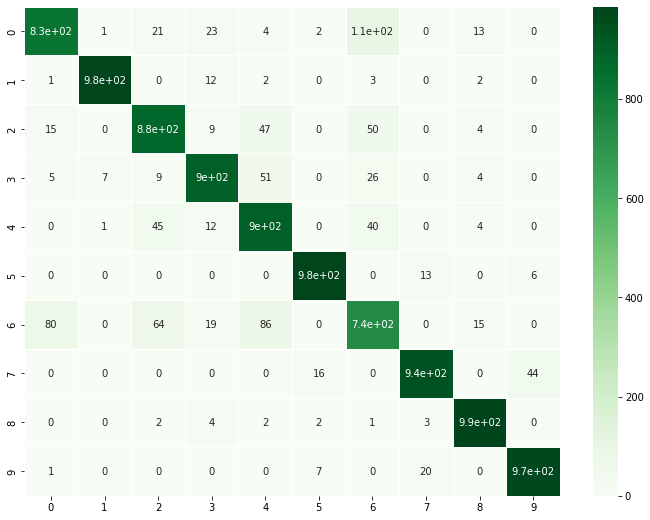

In [15]:
import seaborn as sns
cm = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize = (12,9))
sns.heatmap(cm, annot=True,cmap="Greens",linewidths=.5)
     